In [1]:
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import itertools


In [2]:
import moran
reload(moran)
import empty
reload(empty)

<module 'empty' from '/Users/david/playground/mixed-moran/empty.py'>

In [3]:
def plot(df: pd.DataFrame, *, y: str, title: str):
  plt.figure(figsize=(10, 4))
  g = sns.lineplot(data=df, x='p_Bd', y=y, hue='r', markers=True, marker='o', palette='coolwarm', legend=True)
  g.set(title=f'{title}, N={N}')
  _ = sns.move_legend(g.axes, "upper left", bbox_to_anchor=(1, 1))
  sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(df['r'].min(), df['r'].max()))
  g.axes.get_legend().remove()
  cbar = g.axes.figure.colorbar(sm, ax=g.axes)
  cbar.ax.get_yaxis().labelpad = 15
  cbar.ax.set_ylabel('r', rotation=0)

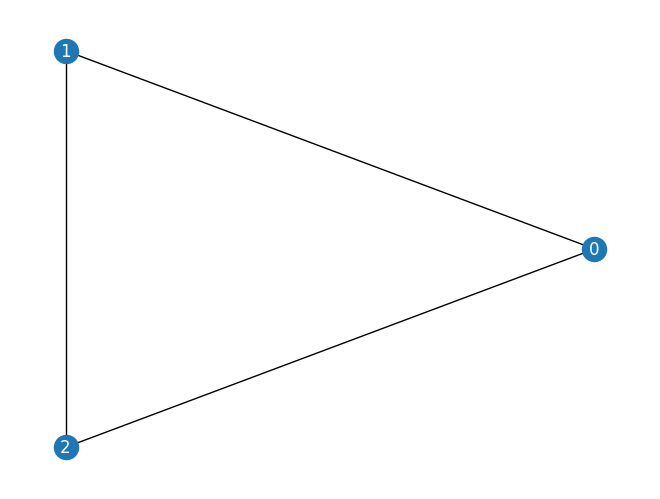

In [7]:
N = 3
# while not nx.is_connected(G := nx.gnp_random_graph(N, .2)): ...
G = nx.complete_graph(N)
assert len(G) == N
nx.draw(G, pos=nx.layout.kamada_kawai_layout(G), with_labels=True, font_color='white')
plt.show()

In [13]:
places = lambda x: ([0] * place + [1] + [0] * (x-place-1) for place in range(x))
# idx = 1
idx = moran.vec_2_idx([1, 0, 0])
data = []
for p_Bd in np.linspace(0, 1, 11):
  for r in np.linspace(0.5, 2, 11):
    data.append((N, r, p_Bd, # sum(
        moran.mixed_moran_fix_prob_sys(G, r=r, p_Bd=p_Bd)[idx],
        moran.mixed_moran_abs_time_sys(G, r=r, p_Bd=p_Bd)[idx],
        moran.mixed_moran_cond_fix_time_sys(G, r=r, p_Bd=p_Bd)[idx],
    ))
    
df = pd.DataFrame(data, columns=["N", "r", "p_Bd", "fp", "at", "cft"])

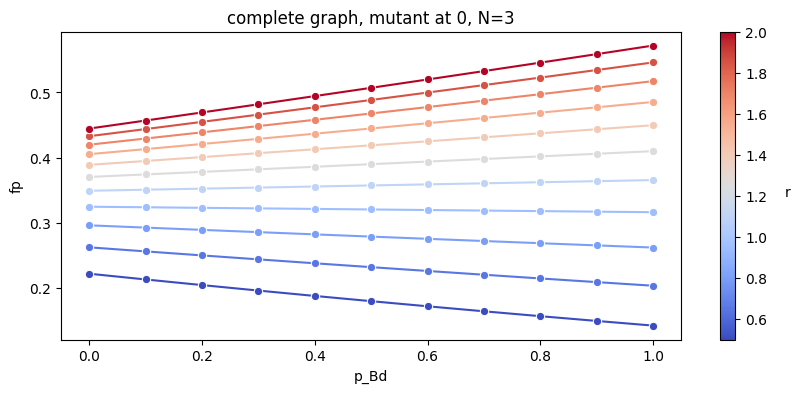

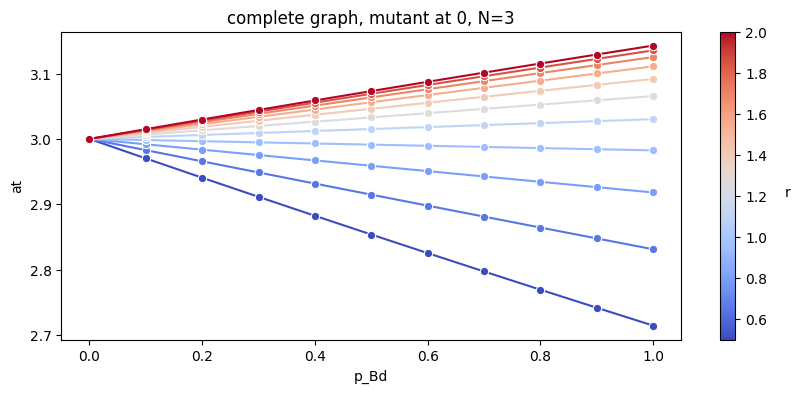

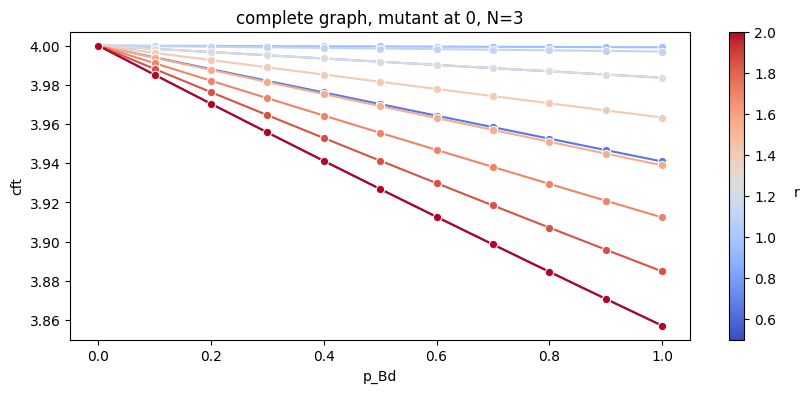

In [14]:
for y in ('fp', 'at', 'cft'):
  plot(df, y=y, title='complete graph, mutant at 0')

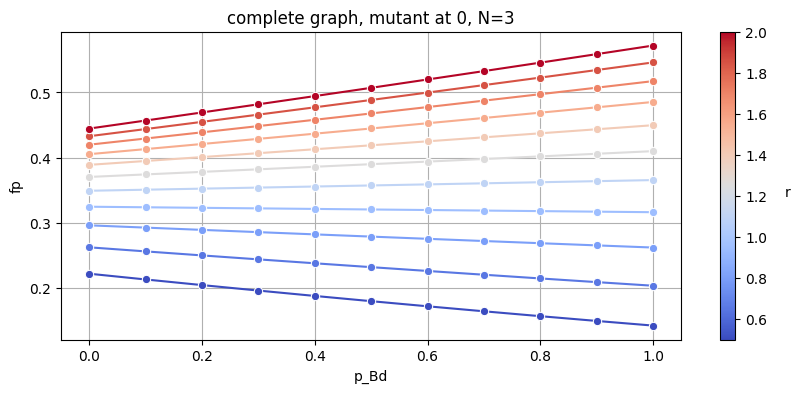

In [ ]:
plot(df, y='fp', title='complete graph, mutant at 0')
jjplt.grid()

In [19]:
empty_dfs = []
for r in np.linspace(0.5, 2, 11):
  empty_ddf = empty.collect_stats(G, r, trials=1_000)
  empty_ddf['r'] = r
  empty_dfs.append(empty_ddf)

empty_df = pd.concat(empty_dfs)
empty_df

,fixated,strength,r
0,1,0,0.5
1,1,0,0.5
2,1,0,0.5
3,1,1,0.5
4,1,1,0.5
...,...,...,...
995,0,1,2.0
996,1,1,2.0
997,0,1,2.0
998,0,1,2.0


In [29]:
empty_df.groupby(by='r').mean()

,fixated,strength
r,,
0.50,0.706,0.419
0.65,0.661,0.443
0.80,0.657,0.461
0.95,0.681,0.511
1.10,0.669,0.520
1.25,0.646,0.507
1.40,0.658,0.543
1.55,0.628,0.575
1.70,0.638,0.577


In [ ]:
formatted_df = df.groupby(by=['r','p_Bd']).mean().reset_index()[['r', 'p_Bd', 'fp']]


,r,p_Bd,fp
0,0.5,0.0,0.222222
1,0.5,0.1,0.213433
2,0.5,0.2,0.204840
3,0.5,0.3,0.196442
4,0.5,0.4,0.188235
...,...,...,...
116,2.0,0.6,0.519525
117,2.0,0.7,0.532367
118,2.0,0.8,0.545299
119,2.0,0.9,0.558320


In [765]:
bdf = df.groupby(by='r').idxmax()[['fp']]
bdfn = bdf.to_numpy().flatten()

In [767]:
df[df['r'] == .1].loc[0]

N       3.000000
r       0.100000
p_Bd    0.000000
fp      0.045455
at      3.000000
cft     4.500000
Name: 0, dtype: float64

In [771]:
best = []
for r_idx, r in enumerate(np.linspace(.1, .5, 101)):
  row = df[df['r'] == r].loc[bdfn[r_idx]]
  best.append((r, row['p_Bd'], row['fp']))

best_df = pd.DataFrame(best, columns=['r', 'p_Bd*', 'fp*'])

[Text(0, 0.5, 'value'), Text(0.5, 1.0, 'p_Bd* (blue) and fp* (orange) vs r')]

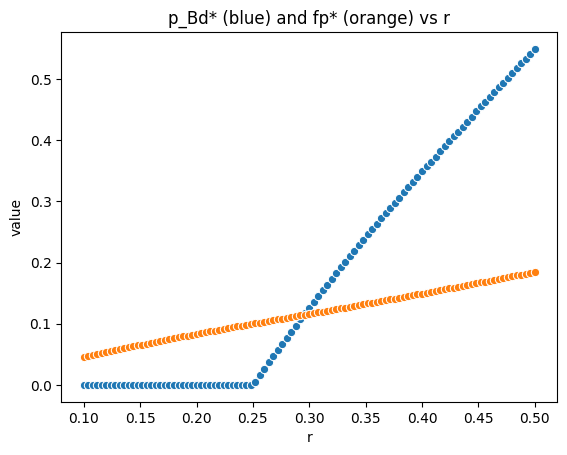

In [773]:
sns.lineplot(best_df, x='r', y='p_Bd*', markers=True, marker='o')
g = sns.lineplot(best_df, x='r', y='fp*', markers=True, marker='o')
g.set(ylabel='value', title='p_Bd* (blue) and fp* (orange) vs r')